学习{mlr3verse}中的特征选择技术。

# 过滤法

## 计算过滤值

In [1]:
library(mlr3verse)
library(tidyverse)

Loading required package: mlr3

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
flt()

# <DictionaryFilter> with 23 stored values
# Keys: anova, auc, boruta, carscore, carsurvscore, cmim, correlation,
#   disr, find_correlation, importance, information_gain, jmi, jmim,
#   kruskal_test, mim, mrmr, njmim, performance, permutation, relief,
#   selected_features, univariate_cox, variance

<DictionaryFilter> with 23 stored values
Keys: anova, auc, boruta, carscore, carsurvscore, cmim, correlation,
  disr, find_correlation, importance, information_gain, jmi, jmim,
  kruskal_test, mim, mrmr, njmim, performance, permutation, relief,
  selected_features, univariate_cox, variance

In [3]:
flt_gain <- flt("information_gain")

In [ ]:
tsk_pen <- tsk("penguins")
flt_gain$calculate(tsk_pen)
flt_gain

# <FilterInformationGain:information_gain>: Information Gain
# Task Types: classif, regr
# Properties: missings
# Task Properties: -
# Packages: FSelectorRcpp
# Feature types: integer, numeric, factor, ordered
#           feature       score
# 1: flipper_length 0.581167901
# 2:    bill_length 0.544896584
# 3:     bill_depth 0.538718879
# 4:         island 0.520157171
# 5:      body_mass 0.442879511
# 6:            sex 0.007244168
# 7:           year 0.000000000

<FilterInformationGain:information_gain>: Information Gain
Task Types: classif, regr
Properties: missings
Task Properties: -
Packages: FSelectorRcpp
Feature types: integer, numeric, factor, ordered
          feature       score
1: flipper_length 0.581167901
2:    bill_length 0.544896584
3:     bill_depth 0.538718879
4:         island 0.520157171
5:      body_mass 0.442879511
6:            sex 0.007244168
7:           year 0.000000000

In [ ]:
flt_cor <- flt("correlation", method = "spearman")
flt_cor$param_set

# <ParamSet(2)>
#        id    class lower upper nlevels    default    value
#    <char>   <char> <num> <num>   <num>     <list>   <list>
# 1:    use ParamFct    NA    NA       5 everything   [NULL]
# 2: method ParamFct    NA    NA       3    pearson spearman

<ParamSet(2)>
       id    class lower upper nlevels    default    value
   <char>   <char> <num> <num>   <num>     <list>   <list>
1:    use ParamFct    NA    NA       5 everything   [NULL]
2: method ParamFct    NA    NA       3    pearson spearman

## 特征重要性过滤器

In [ ]:
as.data.table(mlr_learners)[
  sapply(
    properties,
    function(x) "importance" %in% x
  )
] %>%
  select(key) %>%
  print()

# Key: <key>
#                    key
#                 <char>
# 1: classif.featureless
# 2:      classif.ranger
# 3:       classif.rpart
# 4:     classif.xgboost
# 5:    regr.featureless
# 6:         regr.ranger
# 7:          regr.rpart
# 8:        regr.xgboost

Key: <key>
                   key
                <char>
1: classif.featureless
2:      classif.ranger
3:       classif.rpart
4:     classif.xgboost
5:    regr.featureless
6:         regr.ranger
7:          regr.rpart
8:        regr.xgboost


In [ ]:
lrn("classif.ranger")$param_set$levels$importance

# [1] "none"               "impurity"           "impurity_corrected"
# [4] "permutation"

[1] "none"               "impurity"           "impurity_corrected"
[4] "permutation"

In [12]:
lrn_ranger <- lrn(
  "classif.ranger",
  importance = "impurity"
)

In [ ]:
tsk_pen <- tsk("penguins")
tsk_pen$filter(tsk_pen$row_ids[complete.cases(tsk_pen$data())])

In [ ]:
flt_importance <- flt("importance", learner = lrn_ranger)
flt_importance$calculate(tsk_pen)
as.data.table(flt_importance)

# feature        score    
# 1 bill_length    74.386331
# 2 flipper_length 48.335003
# 3 bill_depth     35.978744
# 4 body_mass      25.779731
# 5 island         23.768176
# 6 sex             1.896537
# 7 year            1.122812

feature,score
<chr>,<dbl>
bill_length,74.386331
flipper_length,48.335003
bill_depth,35.978744
body_mass,25.779731
island,23.768176
sex,1.896537
year,1.122812


## 嵌入法

In [ ]:
as.data.table(mlr_learners)[
  sapply(
    properties,
    function(x) "selected_features" %in% x
  )
] %>%
  select(key)

# key                
# 1 classif.cv_glmnet  
# 2 classif.featureless
# 3 classif.ranger     
# 4 classif.rpart      
# 5 regr.cv_glmnet     
# 6 regr.featureless   
# 7 regr.ranger        
# 8 regr.rpart

key
<chr>
classif.cv_glmnet
classif.featureless
classif.ranger
classif.rpart
regr.cv_glmnet
regr.featureless
regr.ranger
regr.rpart


In [ ]:
tsk_pen <- tsk("penguins")
lrn_rpart <- lrn("classif.rpart")
lrn_rpart$train(tsk_pen)
lrn_rpart$selected_features()

# [1] "flipper_length" "bill_length"    "island"

[1] "flipper_length" "bill_length"    "island"

In [ ]:
flt_selected_features <- flt("selected_features", learner = lrn_rpart)
flt_selected_features$calculate(tsk_pen)
as.data.table(flt_selected_features)

# feature        score
# 1 flipper_length 1    
# 2 island         1    
# 3 bill_length    1    
# 4 year           0    
# 5 bill_depth     0    
# 6 sex            0    
# 7 body_mass      0

feature,score
<chr>,<dbl>
flipper_length,1
island,1
bill_length,1
year,0
bill_depth,0
sex,0
body_mass,0


## 基于过滤法的特征选择

In [ ]:
flt_selected_features$calculate(tsk_pen)
keep <- names(which(flt_selected_features$scores == 1))
tsk_pen$select(keep)
tsk_pen$feature_names

# [1] "bill_length"    "flipper_length" "island"

[1] "bill_length"    "flipper_length" "island"

In [ ]:
tsk_pen <- tsk("penguins")
flt_gain <- flt("information_gain")
flt_gain$calculate(tsk_pen)

# 选择信息增益排名前3的特征
keep <- names(sort(flt_gain$scores, decreasing = TRUE)[1:3])
tsk_pen$select(keep)
tsk_pen$feature_names

# [1] "bill_depth"     "bill_length"    "flipper_length"

[1] "bill_depth"     "bill_length"    "flipper_length"

In [25]:
class(flt_gain$scores)

[1] "numeric"

In [ ]:
tsk_pen <- tsk("penguins")
flt_gain <- flt("information_gain")
flt_gain$calculate(tsk_pen)

# 选择信息增益分数大于0.5的所有特征
keep <- names(which(flt_gain$scores > 0.5))
tsk_pen$select(keep)
tsk_pen$feature_names

# [1] "bill_depth"     "bill_length"    "flipper_length" "island"

[1] "bill_depth"     "bill_length"    "flipper_length" "island"

# 包装法

## 前向选择示例

In [26]:
tsk_pen <- tsk("penguins")

# 选择变量子集
tsk_pen$select(
  c("bill_depth", "bill_length", "body_mass", "flipper_length")
)

# 定义筛选实例
instance <- fselect(
  fselector = fs("sequential"),
  learner = lrn("classif.rpart"),
  task = tsk_pen,
  resampling = rsmp("cv", folds = 3),
  measures = msr("classif.acc")
)

INFO  [11:35:31.701] [bbotk] Starting to optimize 4 parameter(s) with '<FSelectorBatchSequential>' and '<TerminatorNone>'
INFO  [11:35:31.736] [bbotk] Evaluating 4 configuration(s)
INFO  [11:35:31.755] [mlr3] Running benchmark with 12 resampling iterations
INFO  [11:35:31.807] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [11:35:31.850] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [11:35:31.861] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [11:35:31.869] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [11:35:31.877] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [11:35:31.883] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [11:35:31.890] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [11:35:31.898] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [11:35:31

In [31]:
as.data.table(instance$archive)[, batch_nr]

[1] 1 1 1 1 2 2 2 3 3 4

In [ ]:
as.data.table(instance$archive)[batch_nr == 1, 1:5]

# bill_depth bill_length body_mass flipper_length classif.acc
# 1  TRUE      FALSE       FALSE     FALSE          0.7383677  
# 2 FALSE       TRUE       FALSE     FALSE          0.7615306  
# 3 FALSE      FALSE        TRUE     FALSE          0.7180015  
# 4 FALSE      FALSE       FALSE      TRUE          0.7934401

bill_depth,bill_length,body_mass,flipper_length,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
TRUE,FALSE,FALSE,FALSE,0.7383677
FALSE,TRUE,FALSE,FALSE,0.7615306
FALSE,FALSE,TRUE,FALSE,0.7180015
FALSE,FALSE,FALSE,TRUE,0.7934401


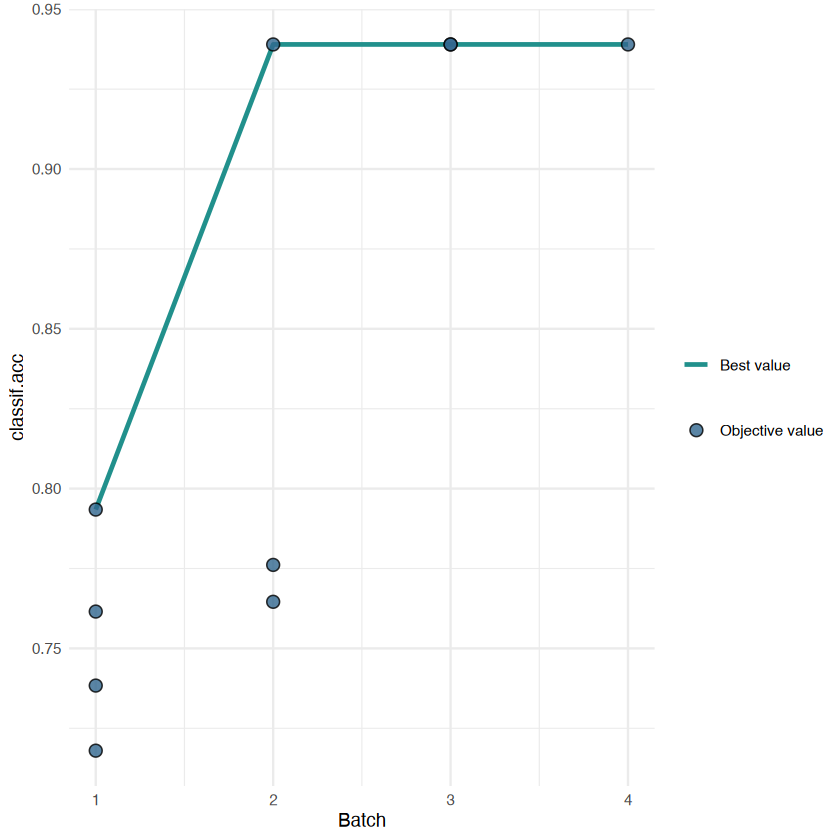

In [33]:
autoplot(instance, type = "performance")

In [ ]:
dt <- as.data.table(instance$archive)
dt[batch_nr == 2, 1:5]

# bill_depth bill_length body_mass flipper_length classif.acc
# 1  TRUE      FALSE       FALSE     TRUE           0.7761251  
# 2 FALSE       TRUE       FALSE     TRUE           0.9389779  
# 3 FALSE      FALSE        TRUE     TRUE           0.7645817

bill_depth,bill_length,body_mass,flipper_length,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
TRUE,FALSE,FALSE,TRUE,0.7761251
FALSE,TRUE,FALSE,TRUE,0.9389779
FALSE,FALSE,TRUE,TRUE,0.7645817


In [ ]:
instance$result_feature_set

# [1] "bill_length"    "flipper_length"

[1] "bill_length"    "flipper_length"

## FSelectInstance 类

In [36]:
instance <- fsi(
  task = tsk_pen,
  learner = lrn_rpart,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 20)
)

## FSelector 类

In [37]:
fselect <- fs("random_search")

In [38]:
fselect$optimize(instance)

INFO  [11:53:33.573] [bbotk] Starting to optimize 4 parameter(s) with '<FSelectorBatchRandomSearch>' and '<TerminatorEvals> [n_evals=20, k=0]'
INFO  [11:53:33.585] [bbotk] Evaluating 10 configuration(s)
INFO  [11:53:33.685] [mlr3] Running benchmark with 30 resampling iterations
INFO  [11:53:33.691] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [11:53:33.704] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [11:53:33.714] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [11:53:33.726] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [11:53:33.734] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/3)
INFO  [11:53:33.741] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/3)
INFO  [11:53:33.749] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/3)
INFO  [11:53:33.782] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (ite

bill_depth,bill_length,body_mass,flipper_length,features,n_features,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<list>,<int>,<dbl>
TRUE,TRUE,FALSE,TRUE,"bill_depth , bill_length , flipper_length",3,0.9360285


## 启动特征选择

In [ ]:
as.data.table(instance$result)[, .(features, classif.acc)]

# features                                       classif.acc
# 1 bill_depth    , bill_length   , flipper_length 0.9360285

features,classif.acc
<list>,<dbl>
"bill_depth , bill_length , flipper_length",0.9360285


In [ ]:
as.data.table(instance$archive)[
  1:5,
  .(bill_depth, bill_length, body_mass, flipper_length, classif.acc)
]

# bill_depth bill_length body_mass flipper_length classif.acc
# 1  TRUE      FALSE        TRUE     FALSE          0.7529367  
# 2  TRUE      FALSE        TRUE      TRUE          0.7964912  
# 3 FALSE      FALSE        TRUE     FALSE          0.7063056  
# 4  TRUE      FALSE        TRUE      TRUE          0.7964912  
# 5 FALSE       TRUE       FALSE      TRUE          0.9331299

bill_depth,bill_length,body_mass,flipper_length,classif.acc
<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
TRUE,FALSE,TRUE,FALSE,0.7529367
TRUE,FALSE,TRUE,TRUE,0.7964912
FALSE,FALSE,TRUE,FALSE,0.7063056
TRUE,FALSE,TRUE,TRUE,0.7964912
FALSE,TRUE,FALSE,TRUE,0.9331299


In [42]:
tsk_pen <- tsk("penguins")

tsk_pen$select(instance$result_feature_set)
lrn_rpart$train(tsk_pen)

## 多性能指标

In [43]:
instance <- fsi(
  task = tsk("sonar"),
  learner = lrn_rpart,
  resampling = rsmp("holdout"),
  measure = msrs(c("classif.tpr", "classif.tnr")),
  terminator = trm("evals", n_evals = 20)
)

In [ ]:
fselector <- fs("random_search")
fselector$optimize(instance)

INFO  [12:03:27.132] [bbotk] Starting to optimize 60 parameter(s) with '<FSelectorBatchRandomSearch>' and '<TerminatorEvals> [n_evals=20, k=0]'
INFO  [12:03:27.140] [bbotk] Evaluating 10 configuration(s)
INFO  [12:03:27.184] [mlr3] Running benchmark with 10 resampling iterations
INFO  [12:03:27.251] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 1/1)
INFO  [12:03:27.268] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 1/1)
INFO  [12:03:27.280] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 1/1)
INFO  [12:03:27.290] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 1/1)
INFO  [12:03:27.301] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 1/1)
INFO  [12:03:27.315] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 1/1)
INFO  [12:03:27.327] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 1/1)
INFO  [12:03:27.337] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 1/1)
INFO  [12:03:27.

V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,...,V59,V6,V60,V7,V8,V9,features,n_features,classif.tpr,classif.tnr
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<list>,<int>,<dbl>,<dbl>
TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,...,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,"V1 , V11, V12, V13, V14, V18, V19, V2 , V20, V22, V23, V24, V26, V28, V29, V3 , V33, V34, V36, V37, V39, V4 , V40, V41, V42, V43, V44, V45, V46, V48, V49, V5 , V50, V51, V52, V54, V55, V57, V58, V59, V60, V9",42,0.7368421,0.7419355
TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,...,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,"V1 , V10, V13, V16, V17, V22, V23, V27, V3 , V30, V31, V33, V37, V38, V4 , V40, V41, V42, V43, V45, V46, V50, V53, V54, V55, V56, V57, V58, V6 , V8",42,0.7105263,0.8064516
FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,...,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,"V10, V12, V14, V15, V16, V17, V19, V2 , V20, V22, V23, V24, V27, V28, V3 , V31, V32, V35, V36, V37, V40, V42, V44, V45, V46, V47, V48, V5 , V50, V51, V52, V53, V54, V55, V56, V57, V58, V59, V60, V9",42,0.8684211,0.6451613
TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,...,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,"V1 , V10, V12, V14, V15, V16, V17, V18, V19, V20, V21, V22, V24, V26, V27, V29, V3 , V35, V36, V38, V40, V41, V42, V43, V44, V45, V46, V5 , V50, V53, V54, V55, V56, V57, V59, V60, V7",42,0.8421053,0.6774194
FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,...,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,"V10, V11, V12, V14, V15, V17, V19, V2 , V20, V21, V23, V24, V25, V26, V28, V29, V3 , V30, V31, V32, V33, V34, V35, V37, V38, V39, V4 , V40, V41, V44, V45, V46, V47, V48, V49, V5 , V50, V51, V52, V53, V54, V55, V56, V57, V58, V6 , V60, V7 , V8",42,0.7631579,0.7096774


In [ ]:
as.data.table(instance$result)[, .(features, classif.tpr, classif.tnr)]

# features                                                                                                                                                                                                                                           
# 1 V1 , V11, V12, V13, V14, V18, V19, V2 , V20, V22, V23, V24, V26, V28, V29, V3 , V33, V34, V36, V37, V39, V4 , V40, V41, V42, V43, V44, V45, V46, V48, V49, V5 , V50, V51, V52, V54, V55, V57, V58, V59, V60, V9                                    
# 2 V1 , V10, V13, V16, V17, V22, V23, V27, V3 , V30, V31, V33, V37, V38, V4 , V40, V41, V42, V43, V45, V46, V50, V53, V54, V55, V56, V57, V58, V6 , V8                                                                                                
# 3 V10, V12, V14, V15, V16, V17, V19, V2 , V20, V22, V23, V24, V27, V28, V3 , V31, V32, V35, V36, V37, V40, V42, V44, V45, V46, V47, V48, V5 , V50, V51, V52, V53, V54, V55, V56, V57, V58, V59, V60, V9                                              
# 4 V1 , V10, V12, V14, V15, V16, V17, V18, V19, V20, V21, V22, V24, V26, V27, V29, V3 , V35, V36, V38, V40, V41, V42, V43, V44, V45, V46, V5 , V50, V53, V54, V55, V56, V57, V59, V60, V7                                                             
# 5 V10, V11, V12, V14, V15, V17, V19, V2 , V20, V21, V23, V24, V25, V26, V28, V29, V3 , V30, V31, V32, V33, V34, V35, V37, V38, V39, V4 , V40, V41, V44, V45, V46, V47, V48, V49, V5 , V50, V51, V52, V53, V54, V55, V56, V57, V58, V6 , V60, V7 , V8 
#   classif.tpr classif.tnr
# 1 0.7368421   0.7419355  
# 2 0.7105263   0.8064516  
# 3 0.8684211   0.6451613  
# 4 0.8421053   0.6774194  
# 5 0.7631579   0.7096774

features,classif.tpr,classif.tnr
<list>,<dbl>,<dbl>
"V1 , V11, V12, V13, V14, V18, V19, V2 , V20, V22, V23, V24, V26, V28, V29, V3 , V33, V34, V36, V37, V39, V4 , V40, V41, V42, V43, V44, V45, V46, V48, V49, V5 , V50, V51, V52, V54, V55, V57, V58, V59, V60, V9",0.7368421,0.7419355
"V1 , V10, V13, V16, V17, V22, V23, V27, V3 , V30, V31, V33, V37, V38, V4 , V40, V41, V42, V43, V45, V46, V50, V53, V54, V55, V56, V57, V58, V6 , V8",0.7105263,0.8064516
"V10, V12, V14, V15, V16, V17, V19, V2 , V20, V22, V23, V24, V27, V28, V3 , V31, V32, V35, V36, V37, V40, V42, V44, V45, V46, V47, V48, V5 , V50, V51, V52, V53, V54, V55, V56, V57, V58, V59, V60, V9",0.8684211,0.6451613
"V1 , V10, V12, V14, V15, V16, V17, V18, V19, V20, V21, V22, V24, V26, V27, V29, V3 , V35, V36, V38, V40, V41, V42, V43, V44, V45, V46, V5 , V50, V53, V54, V55, V56, V57, V59, V60, V7",0.8421053,0.6774194
"V10, V11, V12, V14, V15, V17, V19, V2 , V20, V21, V23, V24, V25, V26, V28, V29, V3 , V30, V31, V32, V33, V34, V35, V37, V38, V39, V4 , V40, V41, V44, V45, V46, V47, V48, V49, V5 , V50, V51, V52, V53, V54, V55, V56, V57, V58, V6 , V60, V7 , V8",0.7631579,0.7096774


In [ ]:
afs <- auto_fselector(
  fselector = fs("random_search"),
  learner = lrn("classif.log_reg"),
  resampling = rsmp("holdout"),
  measure = msr("classif.acc"),
  terminator = trm("evals", n_evals = 10)
)
afs

# <AutoFSelector:classif.log_reg.fselector>
# * Model: list
# * Packages: mlr3, mlr3fselect, mlr3learners, stats
# * Predict Type: response
# * Feature Types: logical, integer, numeric, character, factor, ordered
# * Properties: offset, twoclass, weights

<AutoFSelector:classif.log_reg.fselector>
* Model: list
* Packages: mlr3, mlr3fselect, mlr3learners, stats
* Predict Type: response
* Feature Types: logical, integer, numeric, character, factor, ordered
* Properties: offset, twoclass, weights

In [ ]:
grid <- benchmark_grid(
  tsk("sonar"),
  list(afs, lrn("classif.log_reg")),
  rsmp("cv", folds = 3)
)

bmr <- benchmark(grid)$aggregate(msr("classif.acc"))
as.data.table(bmr)[, .(learner_id, classif.acc)]

# learner_id                classif.acc
# 1 classif.log_reg.fselector 0.7071774  
# 2 classif.log_reg           0.6345066

INFO  [12:06:02.982] [mlr3] Running benchmark with 6 resampling iterations
INFO  [12:06:02.988] [mlr3] Applying learner 'classif.log_reg.fselector' on task 'sonar' (iter 1/3)
INFO  [12:06:03.050] [bbotk] Starting to optimize 60 parameter(s) with '<FSelectorBatchRandomSearch>' and '<TerminatorEvals> [n_evals=10, k=0]'
INFO  [12:06:03.051] [bbotk] Evaluating 10 configuration(s)
INFO  [12:06:03.082] [mlr3] Running benchmark with 10 resampling iterations
INFO  [12:06:03.087] [mlr3] Applying learner 'classif.log_reg' on task 'sonar' (iter 1/1)
INFO  [12:06:03.177] [mlr3] Applying learner 'classif.log_reg' on task 'sonar' (iter 1/1)
INFO  [12:06:03.203] [mlr3] Applying learner 'classif.log_reg' on task 'sonar' (iter 1/1)
INFO  [12:06:03.218] [mlr3] Applying learner 'classif.log_reg' on task 'sonar' (iter 1/1)
INFO  [12:06:03.250] [mlr3] Applying learner 'classif.log_reg' on task 'sonar' (iter 1/1)
INFO  [12:06:03.257] [mlr3] Applying learner 'classif.log_reg' on task 'sonar' (iter 1/1)
INFO 

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

INFO  [12:06:04.284] [mlr3] Finished benchmark


learner_id,classif.acc
<chr>,<dbl>
classif.log_reg.fselector,0.7071774
classif.log_reg,0.6345066


# 练习

## 练习1

In [ ]:
# 定义任务
tsk_mtcars <- tsk("mtcars")

# 定义学习器
lrn_kknn <- lrn("regr.kknn")

# 定义评估指标
msr_mse <- msr("regr.mse")

# 定义重抽样策略
rsmp_cv10 <- rsmp("cv", folds = 10)

rr_all <- resample(
  task = tsk_mtcars,
  learner = lrn_kknn,
  resampling = rsmp_cv10
)

rr_all$aggregate(msr_mse)

# regr.mse 
# 10.60599

INFO  [16:05:35.762] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 1/10)
INFO  [16:05:36.101] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 2/10)
INFO  [16:05:36.134] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 3/10)
INFO  [16:05:36.187] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 4/10)
INFO  [16:05:36.199] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 5/10)
INFO  [16:05:36.215] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 6/10)
INFO  [16:05:36.227] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 7/10)
INFO  [16:05:36.239] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 8/10)
INFO  [16:05:36.251] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 9/10)
INFO  [16:05:36.262] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 10/10)


regr.mse 
10.60599

In [ ]:
flt_cor <- flt("correlation")
flt_cor$calculate(tsk_mtcars)
flt_cor$scores

# wt       cyl      disp        hp      drat        vs        am      carb 
# 0.8676594 0.8521620 0.8475514 0.7761684 0.6811719 0.6640389 0.5998324 0.5509251 
#      gear      qsec 
# 0.4802848 0.4186840

wt       cyl      disp        hp      drat        vs        am      carb 
0.8676594 0.8521620 0.8475514 0.7761684 0.6811719 0.6640389 0.5998324 0.5509251 
     gear      qsec 
0.4802848 0.4186840

In [ ]:
keep <- names(sort(flt_cor$scores, decreasing = TRUE)[1:5])
tsk_mtcars_filtered <- tsk_mtcars$select(keep)

rr_filtered <- resample(
  task = tsk_mtcars_filtered,
  learner = lrn_kknn,
  resampling = rsmp_cv10
)

rr_filtered$aggregate(msr_mse)

# regr.mse 
# 7.938336 

INFO  [16:10:54.389] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 1/10)
INFO  [16:10:54.414] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 2/10)
INFO  [16:10:54.428] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 3/10)
INFO  [16:10:54.445] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 4/10)
INFO  [16:10:54.464] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 5/10)
INFO  [16:10:54.477] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 6/10)
INFO  [16:10:54.490] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 7/10)
INFO  [16:10:54.616] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 8/10)
INFO  [16:10:54.647] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 9/10)
INFO  [16:10:54.657] [mlr3] Applying learner 'regr.kknn' on task 'mtcars' (iter 10/10)


regr.mse 
7.938336

## 练习2

In [73]:
# 定义任务
tsk_penguins <- tsk("penguins")

# 定义学习器
lrn_rpart <- lrn("classif.rpart")

# 定义评估指标
msr_acc <- msr("classif.acc")

# 定义重抽样策略
rsmp_holdout <- rsmp("holdout")

# 反向选择
fselect_backward <- fselect(
  fselector = fs("sequential", strategy = "sbs"),
  learner = lrn_rpart,
  task = tsk_penguins,
  resampling = rsmp_holdout,
  measures = msr_acc
)

INFO  [16:30:54.110] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchSequential>' and '<TerminatorNone>'
INFO  [16:30:54.113] [bbotk] Evaluating 1 configuration(s)
INFO  [16:30:54.121] [mlr3] Running benchmark with 1 resampling iterations
INFO  [16:30:54.128] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/1)
INFO  [16:30:54.145] [mlr3] Finished benchmark
INFO  [16:30:54.222] [bbotk] Result of batch 1:
INFO  [16:30:54.224] [bbotk]  bill_depth bill_length body_mass flipper_length island  sex year classif.acc
INFO  [16:30:54.224] [bbotk]        TRUE        TRUE      TRUE           TRUE   TRUE TRUE TRUE   0.9391304
INFO  [16:30:54.224] [bbotk]  warnings errors runtime_learners                                uhash
INFO  [16:30:54.224] [bbotk]         0      0            0.009 3c80c3a8-3b68-4d37-9d9c-1a7e5db2c91d
INFO  [16:30:54.230] [bbotk] Evaluating 7 configuration(s)
INFO  [16:30:54.241] [mlr3] Running benchmark with 7 resampling iterations
INFO  [16:

In [ ]:
fselect_backward$result[, .(features, classif.acc)]

# features                 classif.acc
# 1 bill_length, island      0.9478261

features,classif.acc
<list>,<dbl>
"bill_length, island",0.9478261


In [ ]:
# 正向选择
fselect_forward <- fselect(
  fselector = fs("sequential", strategy = "sfs"),
  learner = lrn_rpart,
  task = tsk_penguins,
  resampling = rsmp_holdout,
  measures = msr_acc
)

fselect_forward$result[, .(features, classif.acc)]

# features                                       classif.acc
# 1 bill_length   , flipper_length, island         0.9565217

INFO  [16:32:34.462] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchSequential>' and '<TerminatorNone>'
INFO  [16:32:34.464] [bbotk] Evaluating 7 configuration(s)
INFO  [16:32:34.583] [mlr3] Running benchmark with 7 resampling iterations
INFO  [16:32:34.589] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/1)
INFO  [16:32:34.597] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/1)
INFO  [16:32:34.603] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/1)
INFO  [16:32:34.609] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/1)
INFO  [16:32:34.614] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/1)
INFO  [16:32:34.620] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/1)
INFO  [16:32:34.626] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/1)
INFO  [16:32:34.631] [mlr3] Finished benchmark
INFO  [16:32:34.665] [bbotk] Result of batch 1:
INFO  [16:32

features,classif.acc
<list>,<dbl>
"bill_length , flipper_length, island",0.9565217


## 练习3

In [ ]:
afs_backward <- auto_fselector(
  fselector = fs("sequential", strategy = "sbs"),
  learner = lrn_rpart,
  resampling = rsmp_holdout,
  measure = msr_acc,
  id = "afs_backward"
)

afs_backward

# <AutoFSelector:afs_backward>
# * Model: list
# * Packages: mlr3, mlr3fselect, rpart
# * Predict Type: response
# * Feature Types: logical, integer, numeric, factor, ordered
# * Properties: importance, missings, multiclass, selected_features,
#   twoclass, weights

<AutoFSelector:afs_backward>
* Model: list
* Packages: mlr3, mlr3fselect, rpart
* Predict Type: response
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, multiclass, selected_features,
  twoclass, weights

In [ ]:
afs_foward <- auto_fselector(
  fselector = fs("sequential", strategy = "sfs"),
  learner = lrn_rpart,
  resampling = rsmp_holdout,
  measure = msr_acc,
  id = "afs_forward"
)

afs_foward

# <AutoFSelector:afs_forward>
# * Model: list
# * Packages: mlr3, mlr3fselect, rpart
# * Predict Type: response
# * Feature Types: logical, integer, numeric, factor, ordered
# * Properties: importance, missings, multiclass, selected_features,
#   twoclass, weights

<AutoFSelector:afs_forward>
* Model: list
* Packages: mlr3, mlr3fselect, rpart
* Predict Type: response
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, multiclass, selected_features,
  twoclass, weights

In [89]:
rsmp_cv10 <- rsmp("cv", folds = 10)

design <- benchmark_grid(
  task = tsk("penguins"),
  learners = list(afs_backward, afs_foward),
  resampling = rsmp_cv10
)

bmr <- benchmark(design)

INFO  [17:00:25.026] [mlr3] Running benchmark with 20 resampling iterations
INFO  [17:00:25.030] [mlr3] Applying learner 'afs_backward' on task 'penguins' (iter 1/10)
INFO  [17:00:25.065] [bbotk] Starting to optimize 7 parameter(s) with '<FSelectorBatchSequential>' and '<TerminatorNone>'
INFO  [17:00:25.066] [bbotk] Evaluating 1 configuration(s)
INFO  [17:00:25.069] [mlr3] Running benchmark with 1 resampling iterations
INFO  [17:00:25.071] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/1)
INFO  [17:00:25.079] [mlr3] Finished benchmark
INFO  [17:00:25.091] [bbotk] Result of batch 1:
INFO  [17:00:25.093] [bbotk]  bill_depth bill_length body_mass flipper_length island  sex year classif.acc
INFO  [17:00:25.093] [bbotk]        TRUE        TRUE      TRUE           TRUE   TRUE TRUE TRUE   0.9417476
INFO  [17:00:25.093] [bbotk]  warnings errors runtime_learners                                uhash
INFO  [17:00:25.093] [bbotk]         0      0            0.004 adbb9c73-de1b-

In [ ]:
bmr$aggregate(msr("classif.acc")) %>%
  select(learner_id, classif.acc)

# learner_id   classif.acc
# 1 afs_backward 0.9305882  
# 2 afs_forward  0.9362185

learner_id,classif.acc
<chr>,<dbl>
afs_backward,0.9305882
afs_forward,0.9362185
